#1

Импортируем библиотеки для анализа данных numpy, pandas) и для построения графиков

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing # обучение
import matplotlib.pyplot as plt  # графики
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv') 
# загружаем датасет

Краткое описание признаков:

Age : возраст пациента

Sex : пол пациента

exang: стенокардия из-за физической наргузки (1 = да; 0 = нет)

ca: количество крупных сосудов (0-3)

cp : тип грудной боли

Value 1: типичная стенокардия
Value 2: нетипичная стенокардия
Value 3: боль без стенокардии
Value 4: бессимптомная боль

trtbps : артериальное давление в покое (in mm Hg)

chol : холестерин в мг

fbs : (уровень сахара в крови натощак > 120 мг/дл(децилитр)) (1 = true; 0 = false)

rest_ecg : электрокардиография в покое

Value 0: нормальное значение
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack


In [4]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

# Визуализация данных

поделим датасет на категориальные и некатегориальные величины

In [8]:
cat_cols = df[['sex','exng','caa','cp','fbs','restecg','slp','thall', 'output']]
con_cols = df[['age','trtbps','chol', 'thalachh', 'oldpeak', 'output']]

Построим корреляционную матрицу для того, чтобы выявить ненужные признаки

In [9]:
import plotly.express as px
px.imshow(df.corr())

In [10]:
px.histogram(df, x='age').show()

In [11]:
px.histogram(df, x='sex').show()

<Axes: >

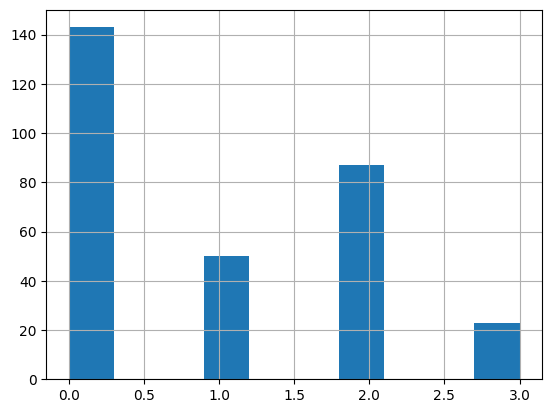

In [12]:
df['cp'].hist()

In [13]:
df.groupby('cp')['sex'].value_counts()

cp  sex
0   1      104
    0       39
1   1       32
    0       18
2   1       52
    0       35
3   1       19
    0        4
Name: sex, dtype: int64

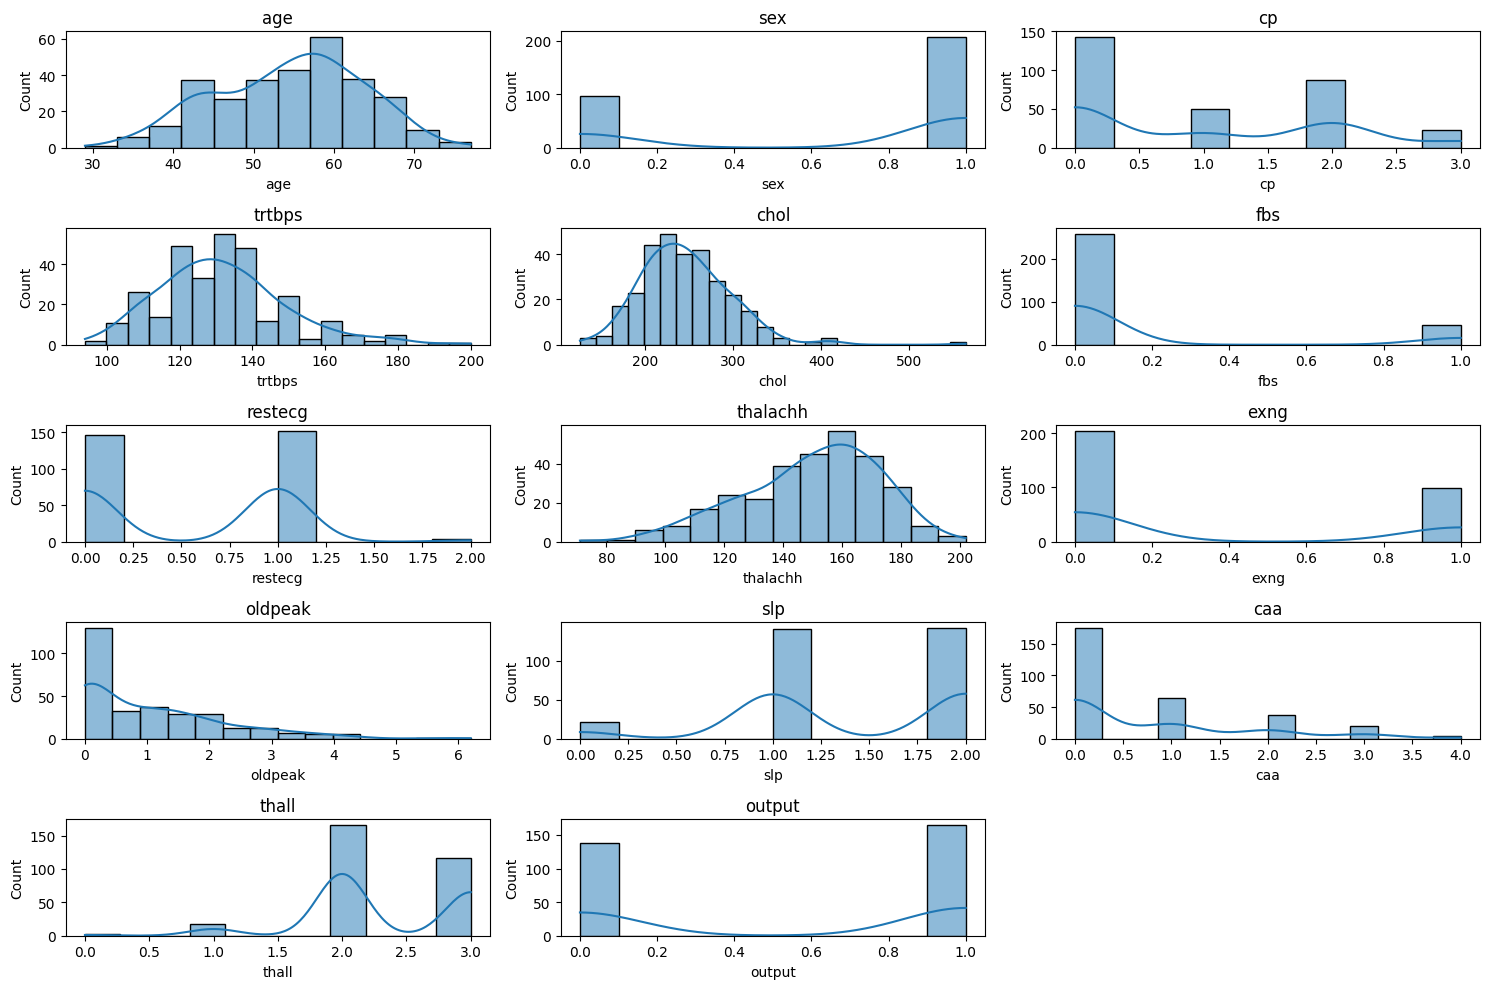

In [14]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(5,3,i) # размер таблицы изображений
    plt.title(col) # название график
    sns.histplot(df[col],kde=True) #
    plt.tight_layout() # чтобы графики с названиями не наехали друг на друга


In [15]:
catcols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
concols = list(set(df.columns) - set(catcols))
concols.append('output')
print(concols)

['oldpeak', 'thalachh', 'chol', 'trtbps', 'age', 'output']


In [16]:
px.imshow(df[catcols].corr())

In [17]:
px.imshow(df[concols].corr())

параметр oldpeak имеет очень низкую корреляцию с output и thalachh, параметром, сильно коррелирующим с output. Можно его исключить

[Text(0.5, 0, 'age')]

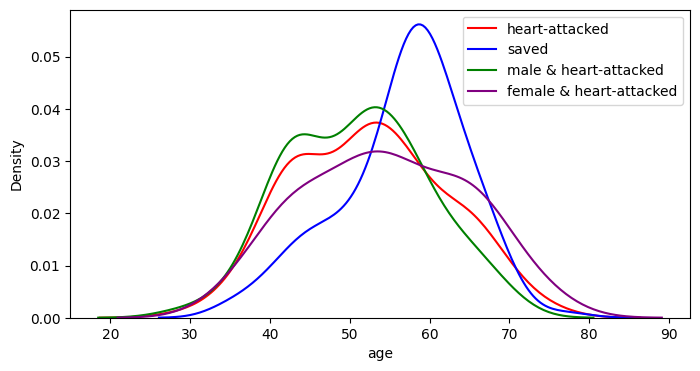

In [18]:
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['age'][df.output == 1], color='red')
sns.kdeplot(df['age'][df.output == 0], color='blue')
ax = sns.kdeplot(df[df['sex'] == 1]['age'][df.output == 1], color='green')
ax = sns.kdeplot(df[df['sex'] == 0]['age'][df.output == 1], color='purple')
plt.legend(['heart-attacked', 'saved', 'male & heart-attacked', 'female & heart-attacked'])
ax.set(xlabel='age')

[Text(0.5, 0, 'age')]

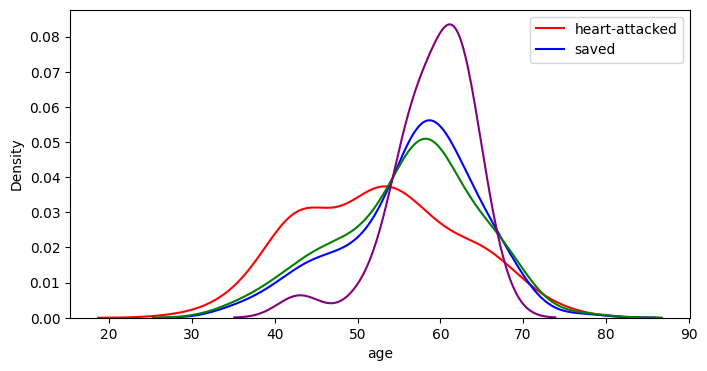

In [19]:
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['age'][df.output == 1], color='red')
sns.kdeplot(df['age'][df.output == 0], color='blue')
ax = sns.kdeplot(df[df['sex'] == 1]['age'][df.output == 0], color='green')
ax = sns.kdeplot(df[df['sex'] == 0]['age'][df.output == 0], color='purple')
plt.legend(['heart-attacked', 'saved'])
ax.set(xlabel='age')

зависимости между полом, возрастом и приступом почти нет, но видно, что в возрасте 60 лет люди реже испытывают приступ

Зависимость сердечного приступа от типа грудной боли у мужчин и у женщин

[Text(0.5, 0, 'chest pain')]

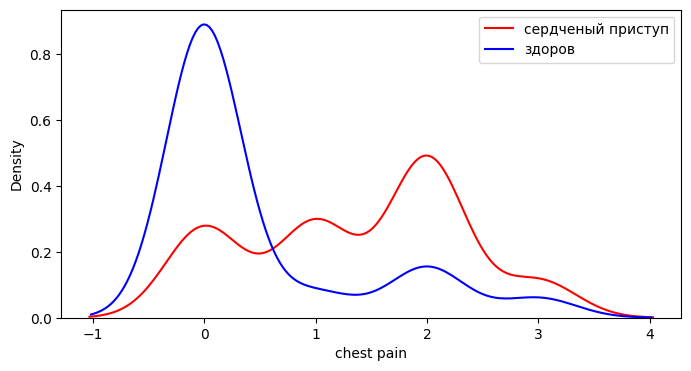

In [20]:
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['cp'][df.output == 1], color='red')
sns.kdeplot(df['cp'][df.output == 0], color='blue')

plt.legend(['сердченый приступ', 'здоров'])
ax.set(xlabel='chest pain')

[]

<Figure size 1500x1000 with 0 Axes>

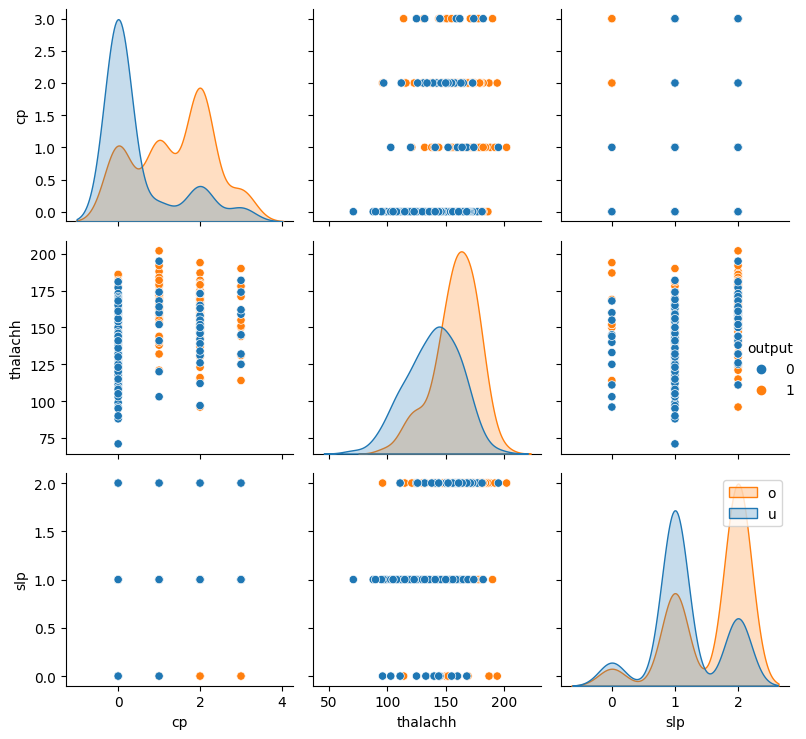

In [21]:
"""cr = ['slp', 'cp', 'thalachh', 'output']
px.imshow(df[cr].corr())
"""
c = ['cp', 'thalachh', 'slp', 'output']
plt.figure(figsize=(15, 10))
sns.pairplot(df[c], hue='output')
plt.legend("output")
plt.tight_layout()
plt.plot()

Самые сильные корреляты для output - cp, slp, thalachh. 

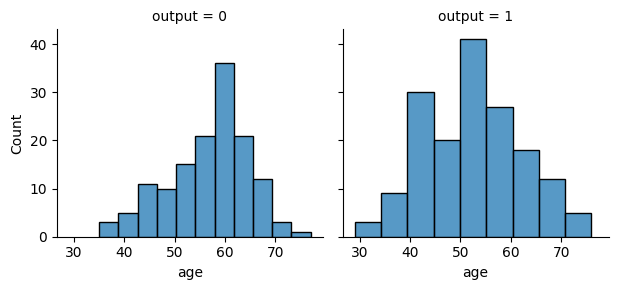

In [22]:
g = sns.FacetGrid(data=df, col='output', col_wrap= 4 ).map (sns.histplot , 'age') 


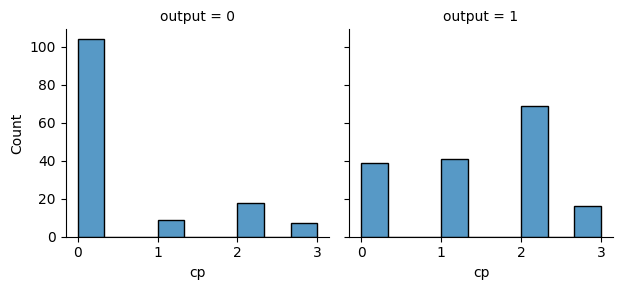

In [23]:
g = sns.FacetGrid(data=df, col='output', col_wrap= 4 ).map (sns.histplot , 'cp') 

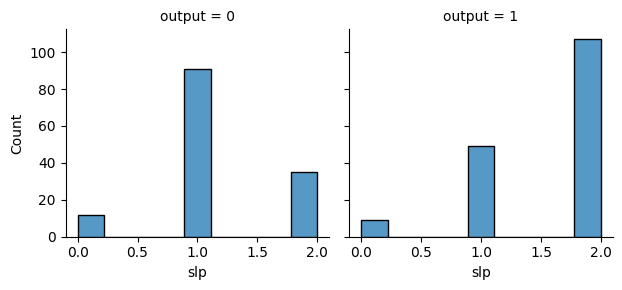

In [24]:
g = sns.FacetGrid(data=df, col='output', col_wrap= 4 ).map (sns.histplot , 'slp') 

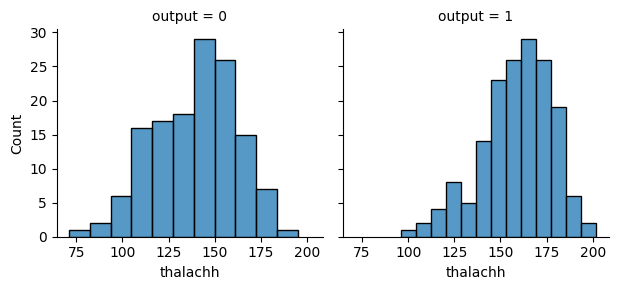

In [25]:
g = sns.FacetGrid(data=df, col='output', col_wrap= 4 ).map (sns.histplot , 'thalachh') 

Что видно на графиках: при slp, равном 2, шанс сердечного приступа очень высок. При cp = 0, шанс статестически очень низок. Можно объединить эти признаки в одном графике, и, возможно, добавить новую переменную

[Text(0.5, 0, 'slp')]

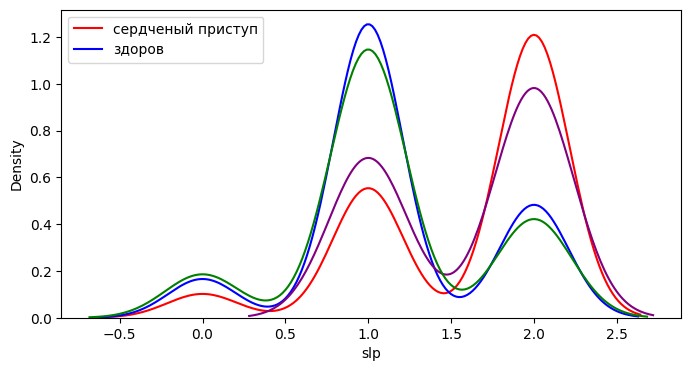

In [26]:
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['slp'][df.output == 1], color='red')
sns.kdeplot(df['slp'][df.output == 0], color='blue')
sns.kdeplot(df[df['cp']==0]['slp'][df.output == 1], color='purple')
sns.kdeplot(df[df['cp']==0]['slp'][df.output == 0], color='green')
plt.legend(['сердченый приступ', 'здоров'])
ax.set(xlabel='slp')

[Text(0.5, 0, 'slp')]

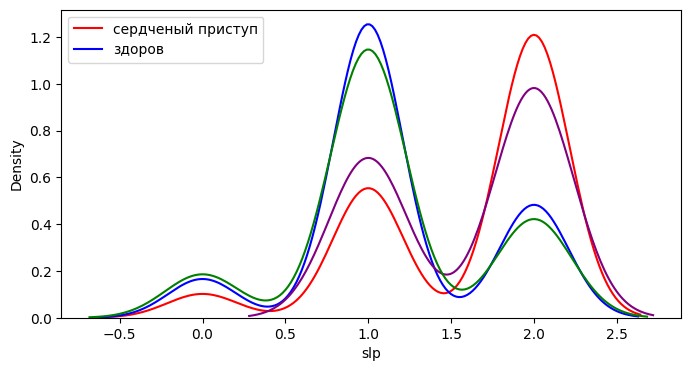

In [27]:
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['slp'][df.output == 1], color='red')
sns.kdeplot(df['slp'][df.output == 0], color='blue')
sns.kdeplot(df[df['cp']==0]['slp'][df.output == 1], color='purple')
sns.kdeplot(df[df['cp']==0]['slp'][df.output == 0], color='green')
plt.legend(['сердченый приступ', 'здоров'])
ax.set(xlabel='slp')

In [28]:
for output, sub in df.groupby(['output']):
  print(output, sub['cp'].value_counts())

0 0    104
2     18
1      9
3      7
Name: cp, dtype: int64
1 2    69
1    41
0    39
3    16
Name: cp, dtype: int64


<ipython-input-28-67d84b5ec9e0>:1: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



In [29]:
#имеет смысл добавить столбец: cp == 0

In [30]:
pd.crosstab(df['cp'], df['slp'])

slp,0,1,2
cp,,,
0,11,84,48
1,2,12,36
2,5,33,49
3,3,11,9


#Секция 3

In [31]:
df[df['output'] == 0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Данные с output = 0 располагаются в конце, для грамотно составленной тестовой и тренировочной выборок нужно их перемешать

In [32]:
from sklearn.utils import shuffle
df = shuffle(df)

In [33]:
train_df = df[:int(0.8 * df.shape[0])] # тренировочная выборка
test_df = df[(train_df.shape[0]):] # тестовая выборка - 20 % от основной
print(train_df.shape, test_df.shape, df.shape)

(242, 14) (61, 14) (303, 14)


In [34]:
#train_df = train_df.drop(['oldpeak'], axis=1) # убираем oldpeak

In [35]:
train_df['output'].value_counts()

1    127
0    115
Name: output, dtype: int64

In [36]:
# добавляем колонку cp == 0

In [37]:
train_df['cp0'] = np.where(train_df['cp'] == 0, 1, 0)

test_df['cp0']=np.where(test_df['cp'] == 0, 1, 0)

<ipython-input-37-b0ea4249939f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-b0ea4249939f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
train_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cp0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,1
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0,1
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0,0
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,0


#Отбор признаков двумя методами

In [39]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=43af9a2c24ecad53dbca55393f3998584edfc7cdfd3779b0f2502ac4d7a90d46
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [40]:
label = train_df['output']
train_df.drop('output', axis=1, inplace=True)

<ipython-input-40-9244091e9663>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 ### Отбор признаков методом случайного леса (1)

<Figure size 200x500 with 0 Axes>

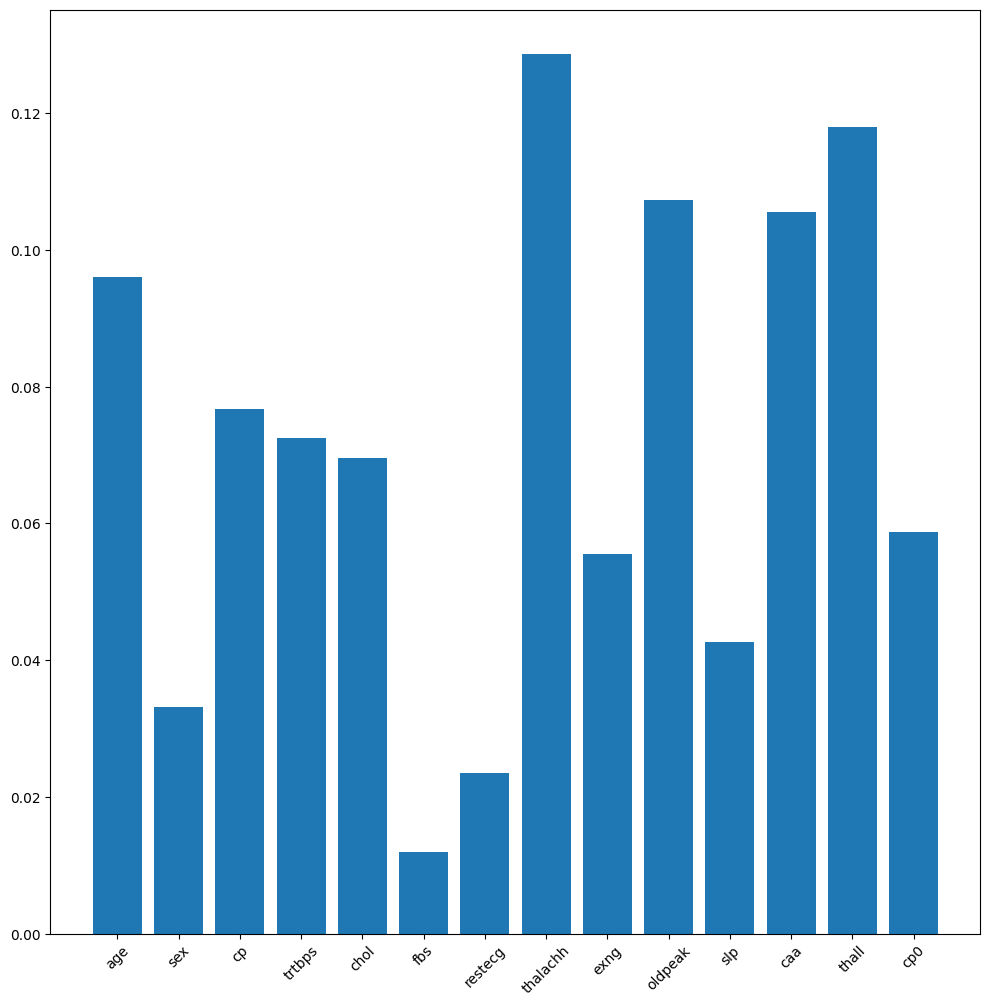

In [41]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(2, 5))
clf = RandomForestClassifier()
clf.fit(train_df, label)
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(train_df.columns, clf.feature_importances_)
plt.xticks(rotation=45)
plt.show()

In [42]:
randomforest_features = ['age', 'thalachh', 'caa', 'thall', 'cp0', 'trtbps', 'oldpeak']
X1 = train_df[randomforest_features]
Y1 = label

## Отбор признаков рекурсивными алгоритмами RFE (2)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = train_df
y = label
model = LogisticRegression()
rfe = RFE(model)
rfe = rfe.fit(X, y)
print(list(X.columns[rfe.support_]))

['sex', 'restecg', 'exng', 'oldpeak', 'caa', 'thall', 'cp0']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

In [44]:
rfe_features = ['sex', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'cp0']
X2= train_df[rfe_features]
Y2 = label

Две модели показали разную значимость признаков, они сохранены в X1 и X



# Секция 4

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X1, # убираем output, axis = 1 - колонка
    label,
    test_size= 0.2,  # тестовая выборка - 20 %
    random_state=0, # воспроизведение через вывод нескольких функций
    shuffle = True, # перемешивание значений
    stratify = label # основной вывод
)



In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression()
clf.fit(X_train, y_train)

Y_pred = clf.predict(X_test)
acc=accuracy_score(y_test, Y_pred)
print('Точность ',round(acc,2)*100,'%')

Точность  76.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X2, # убираем output, axis = 1 - колонка
    label,
    test_size= 0.2,  # тестовая выборка - 20 %
    random_state=0, # воспроизведение через вывод нескольких функций
    shuffle = True, # перемешивание значений
    stratify = label # основной вывод
)

clf = LogisticRegression()
clf.fit(X_train, y_train)

Y_pred = clf.predict(X_test)
acc=accuracy_score(y_test, Y_pred)
print('Точность ',round(acc,2)*100,'%')

Точность  67.0 %


#4